In [194]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

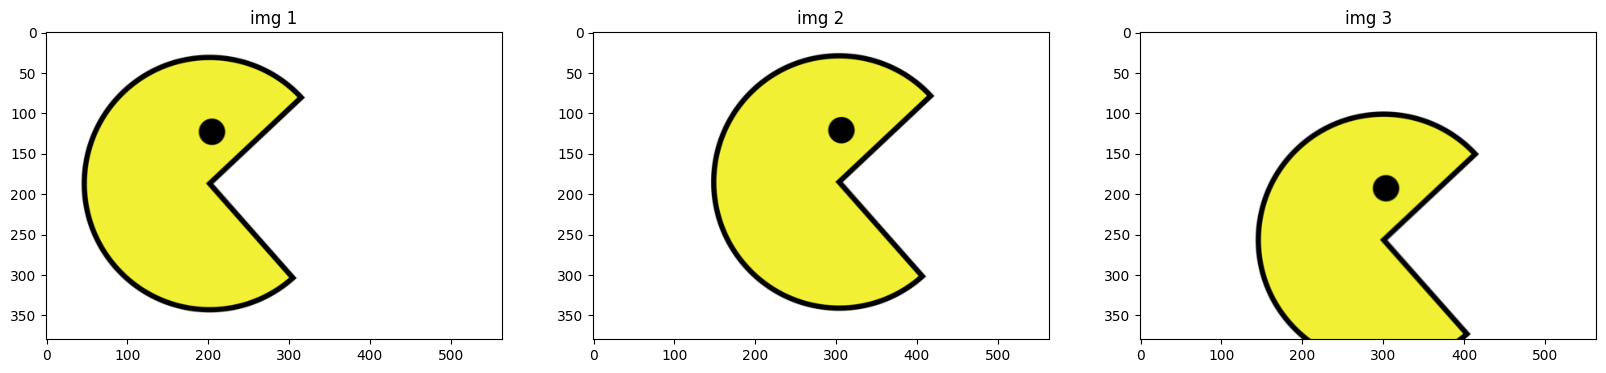

In [195]:
img_1 = cv2.imread('/pac_1.png')
img_2 = cv2.imread('/pac_2.png')
img_3 = cv2.imread('/pac_3.png')

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('img 1')
ax1.imshow(img_1)
ax2.set_title('img 2')
ax2.imshow(img_2)
ax3.set_title('img 3')
ax3.imshow(img_3)

[[[318.  82.]]

 [[308. 304.]]

 [[208. 188.]]

 [[309.  81.]]

 [[299. 304.]]

 [[199. 188.]]]


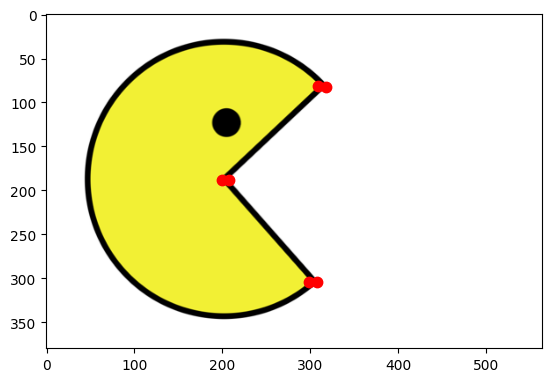

In [196]:
shitomasi_params = dict( maxCorners = 10,
                       qualityLevel = 0.2,
                       minDistance = 5,
                       blockSize = 5 )

img1_gray = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
img3_gray = cv2.cvtColor(img_3, cv2.COLOR_RGB2GRAY)

pts_1 = cv2.goodFeaturesToTrack(img1_gray, mask = None, **shitomasi_params)

plt.imshow(img_1)
for p in pts_1:
    plt.plot(p[0][0], p[0][1], 'r.', markersize=15)

print(pts_1)

In [197]:
of_params = dict( winSize  = (5,5),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

pts_2, status, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, pts_1, None, **of_params)

good_new = pts_2[status==1]
good_old = pts_1[status==1]

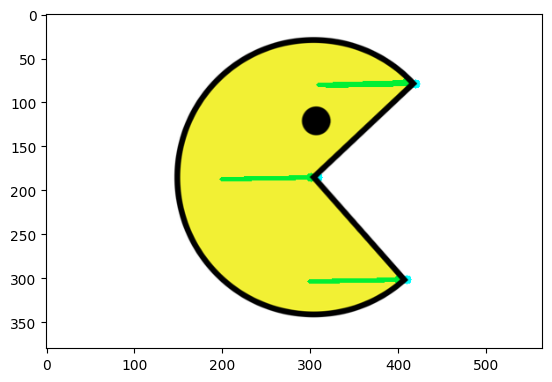

In [198]:
mask = np.zeros_like(img_2)

for i,(new,old) in enumerate(zip(good_new,good_old)):
    x_new,y_new = new
    x_old,y_old = old
    mask = cv2.circle(mask,(int(x_new),int(y_new)),5,(200,0,0),-1)
    mask = cv2.line(mask, (int(x_new),int(y_new)),(int(x_old),int(y_old)), (200,0,0), 3)

composite_im = np.copy(img_2)
composite_im[mask!=0] = 0

plt.imshow(composite_im)

[[[420.  80.]]

 [[410. 302.]]

 [[310. 186.]]

 [[411.  79.]]

 [[401. 302.]]

 [[301. 186.]]]


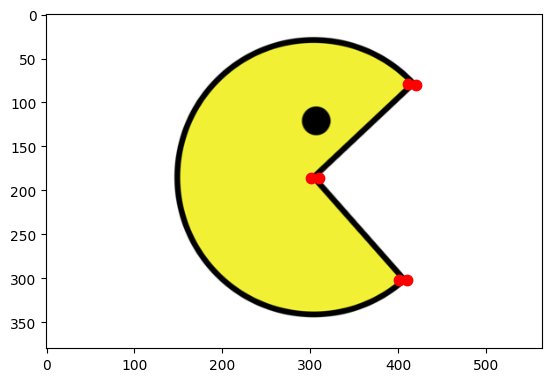

In [199]:
pts_3 = cv2.goodFeaturesToTrack(img2_gray, mask = None, **shitomasi_params)

plt.imshow(img_2)
for p in pts_3:
    plt.plot(p[0][0], p[0][1], 'r.', markersize=15)

print(pts_3)

In [200]:
of_params = dict( winSize  = (5,5),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

pts_4, status, err = cv2.calcOpticalFlowPyrLK(img2_gray, img3_gray, pts_3, None, **of_params)

good_new = pts_4[status==1]
good_old = pts_3[status==1]

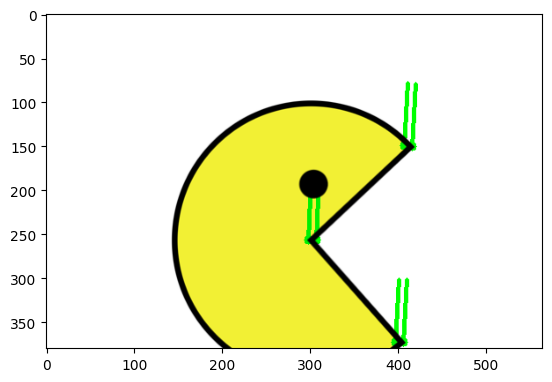

In [201]:
mask = np.zeros_like(img_3)

for i,(new,old) in enumerate(zip(good_new,good_old)):
    x_new,y_new = new
    x_old,y_old = old
    mask = cv2.circle(mask,(int(x_new),int(y_new)),5,(200,0,1),-1)
    mask = cv2.line(mask, (int(x_new),int(y_new)),(int(x_old),int(y_old)), (200,0,1), 3)


composite_im = np.copy(img_3)
composite_im[mask!=0] = 0
plt.imshow(composite_im)